In [1]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py35_0 conda-forge

wordcloud-1.4. 100% |################################| Time: 0:00:00  18.94 MB/s
Wordcloud is installed and imported!


#### Word Clouds are used to perform analysis and visualizations of text data. Here I will analyze the well known novel 'Alice in Wonderland' written by Lewis Carroll.

In [2]:
# download file and save as alice_novel.txt
!wget --quiet https://ibm.box.com/shared/static/m54sjtrshpt5su20dzesl5en9xa5vfz1.txt -O alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

File downloaded and saved!


#### Next i want to set the Stopwords to remove basic and redundant words with little meaning.

In [3]:
stopwords = set(STOPWORDS)

#### Now it's time to create the word cloud object and generate the word cloud. For simplicities sake I will only analyze the first 2000 words of the novel. 

In [4]:
alice_wc = WordCloud(background_color='white',
                    max_words=2000,
                    stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

In [7]:
# import necessary packages to be used
import numpy as np  
import pandas as pd 
from PIL import Image 

import matplotlib.pyplot as plt
%matplotlib inline

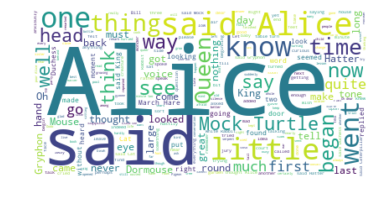

In [8]:
# display and visualize the word cloud.
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### According to this visualization the most common words found in the first 2000 words are Alice, said, little, queen, etc... 

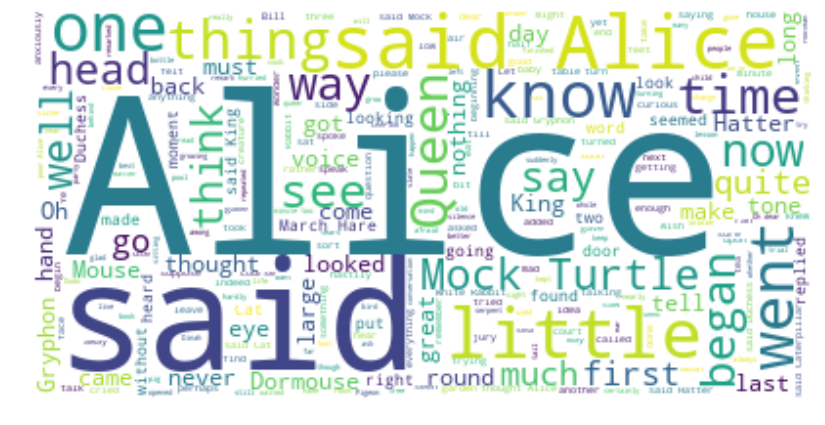

In [11]:
# Resize the immage to make it bigger.
fig = plt.figure()
fig.set_figwidth(14) # set the width
fig.set_figheight(18) # set the height

# disply the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### That looks much better. However, the word "said" isn't really an informative word, so I am going to add it to my Stopwords so it is taken out.

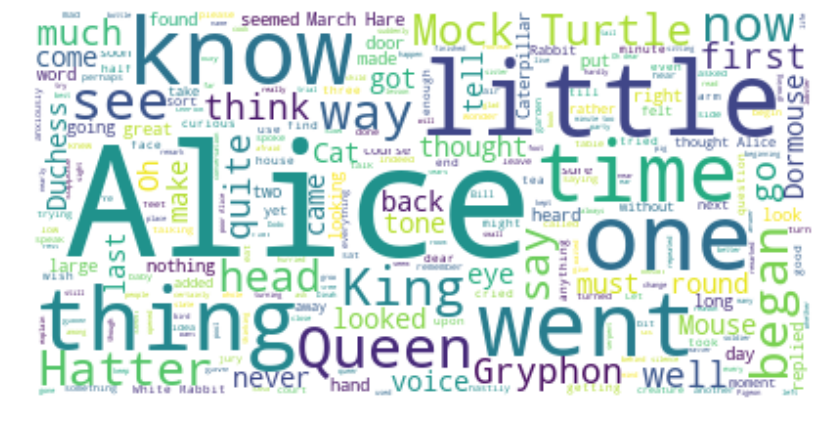

In [12]:
# add 'said' to stopwords
stopwords.add('said') 

# re-generate the word cloud without 'said'
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Looks even better without that giant 'said' there. Now I want to create the word cloud in more interesting shape then a rectangle. I'm going to superimpose the web cloud onto an image of Alice and the rabbit from the novel. 

In [13]:
# download image of Alice and rabbit
!wget --quiet https://ibm.box.com/shared/static/3mpxgaf6muer6af7t1nvqkw9cqj85ibm.png -O alice_mask.png
    
# savemask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))

print('Image downloaded and saved')

Image downloaded and saved


#### Now let's look at how the image looks.

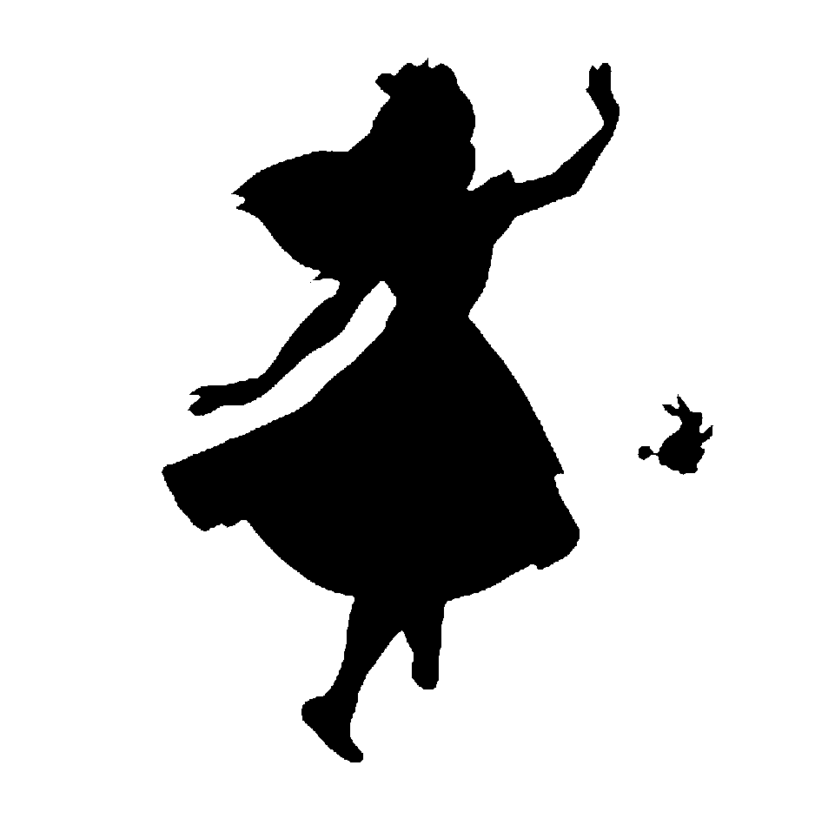

In [16]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Now it's time to shape the word cloud onto the Alice image.

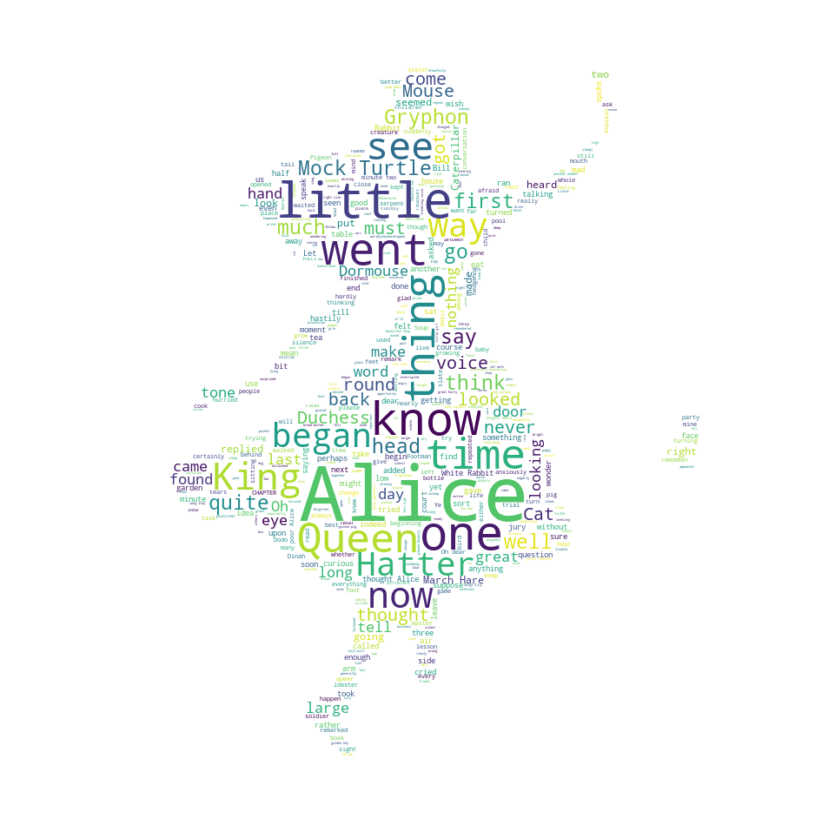

In [17]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### There it is! A nice word cloud in the shape of Alice from Alice in Wonderland. I will probably comeback again later when I'm bored and make more word clouds at another time. 